<a href="https://colab.research.google.com/github/surodoot/Python/blob/main/Tensorflow/Sigmoid%20Function%20Machine%20Learning%20Algorithm%20(Pass%20or%20fail%20prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EPOCH:  1
Train Loss: 0.5548	 Train Accuracy: 100.00%
EPOCH:  2
Train Loss: 0.3884	 Train Accuracy: 100.00%
EPOCH:  3
Train Loss: 0.3155	 Train Accuracy: 100.00%
EPOCH:  4
Train Loss: 0.2738	 Train Accuracy: 100.00%
EPOCH:  5
Train Loss: 0.2463	 Train Accuracy: 100.00%
EPOCH:  6
Train Loss: 0.2267	 Train Accuracy: 100.00%
EPOCH:  7
Train Loss: 0.2118	 Train Accuracy: 100.00%
EPOCH:  8
Train Loss: 0.2001	 Train Accuracy: 100.00%
EPOCH:  9
Train Loss: 0.1905	 Train Accuracy: 100.00%
EPOCH:  10
Train Loss: 0.1826	 Train Accuracy: 100.00%
EPOCH:  11
Train Loss: 0.1758	 Train Accuracy: 100.00%
EPOCH:  12
Train Loss: 0.1700	 Train Accuracy: 100.00%
EPOCH:  13
Train Loss: 0.1649	 Train Accuracy: 100.00%
EPOCH:  14
Train Loss: 0.1605	 Train Accuracy: 100.00%
EPOCH:  15
Train Loss: 0.1565	 Train Accuracy: 100.00%
EPOCH:  16
Train Loss: 0.1529	 Train Accuracy: 100.00%
EPOCH:  17
Train Loss: 0.1496	 Train Accuracy: 100.00%
EPOCH:  18
Train Loss: 0.1467	 Train Accuracy: 100.00%
EPOCH:  19
Train Lo

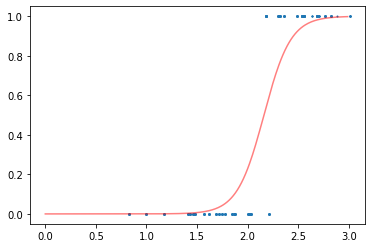

In [4]:
 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# value = input("input :")
 
data = pd.read_csv('/content/한국보건의료인국가시험원_보건의료인국가시험 성적 현황_치과의사_20200529.csv', encoding='cp949') #https://www.data.go.kr/data/15060447/fileData.do
data_ = data[(data['연도'] == 2020) & (data['합격여부'] != '결시')]
data_res = data_.sort_values(by = ['합격여부'])
data_res = data_res.reset_index(drop=True)
data_res = data_res.iloc[0:500]
data_res = data_res.sample(frac=1) 
x_train_pd = data_res['총점']
y_train_kor = data_res['합격여부']
y_train_pd = [1 if i == '합격' else 0 for i in y_train_kor]
x_train = tf.constant(x_train_pd, dtype=tf.float32) / 100
y_train = tf.constant(y_train_pd, dtype=tf.float32)
 
class classifier(tf.keras.Model):
    def __init__(self):
        super(classifier, self).__init__()
 
        self.d1 = tf.keras.layers.Dense(units=1, activation='sigmoid')
 
    def __call__(self, x):
        predictions = self.d1(x)
        return predictions
 
EPOCHS = 20
LR = 0.1
model = classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)
 
loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()
 
for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1))
        y = tf.reshape(y, (1, 1))
 
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
 
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        loss_metric(loss)
        acc_metric(y, predictions)
 
    print("EPOCH: ", epoch+1)
    template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}%'
 
    ds_loss = loss_metric.result()
    ds_acc = acc_metric.result()
 
    print(template.format(ds_loss, ds_acc*100))
 
    loss_metric.reset_states()
    acc_metric.reset_states()
 
test_set = np.arange(0, 3, 0.01, np.float32)
plt.plot(test_set, model(tf.reshape(tf.constant(test_set), (len(test_set), 1))).numpy(), alpha=0.5, color='red')
plt.scatter(x_train, y_train, s=1)
plt.show()